# Week #2 Image Formation, Colors, Point Operations

In [62]:
!wget 'https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe' -O kitty.jpg
!wget 'https://drive.google.com/uc?id=18oft21cCMRsIYwJ0-abLc3mrWAonHGSW' -O rgb.png

--2023-08-16 20:53:46--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 2404:6800:4001:80e::200e, 142.250.199.14
Connecting to drive.google.com (drive.google.com)|2404:6800:4001:80e::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h8q0p0rdt7sn63se12r1onkbinstv3gr/1692194025000/10800959494545164832/*/1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe?uuid=77452ae6-c2e4-48fe-bf16-58482871c4f7 [following]
--2023-08-16 20:53:47--  https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h8q0p0rdt7sn63se12r1onkbinstv3gr/1692194025000/10800959494545164832/*/1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe?uuid=77452ae6-c2e4-48fe-bf16-58482871c4f7
Resolving doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)... 2404:6800:4001:809::2001, 142.250.199.1
Connecting to doc-0s

## Exercise #1 Quantization
* 2 bits

In [72]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np


img = io.imread("kitty.jpg")

gray = color.rgb2gray(img)
gray255 = np.multiply(gray,255)
gray255[gray255<64] = 0
gray255[(gray255>=64) & (gray255<128)] = 1
gray255[(gray255>=128) & (gray255<192)] = 2
gray255[(gray255>=192)] = 3



* Quantize an image to be represented by 1 bit and 4 bits

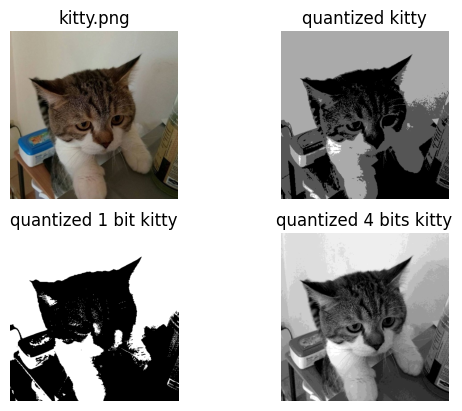

In [85]:
# Write your code here

gray_1_bit = np.copy(color.rgb2gray(img)) * 255
gray_1_bit = np.floor(gray_1_bit/((np.max(gray_1_bit) - np.min(gray_1_bit) + 1)/2))

gray_4_bit = np.copy(np.multiply(gray,255)) * 255
gray_4_bit = np.floor(gray_4_bit/((np.max(gray_4_bit) - np.min(gray_4_bit) + 1)/(2**4)))

plt.subplot(2, 2, 1)
plt.title('kitty.png')
plt.imshow(img)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('quantized kitty')
plt.imshow(gray255, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('quantized 1 bit kitty')
plt.imshow(gray_1_bit, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('quantized 4 bits kitty')
plt.imshow(gray_4_bit, cmap='gray')
plt.axis('off')

plt.savefig('quantization kitty.png')


## Exercise #2 Shrink and Zoom
* Shink an image to 64 x 64
* Zoom in an image to 1000 x 1000

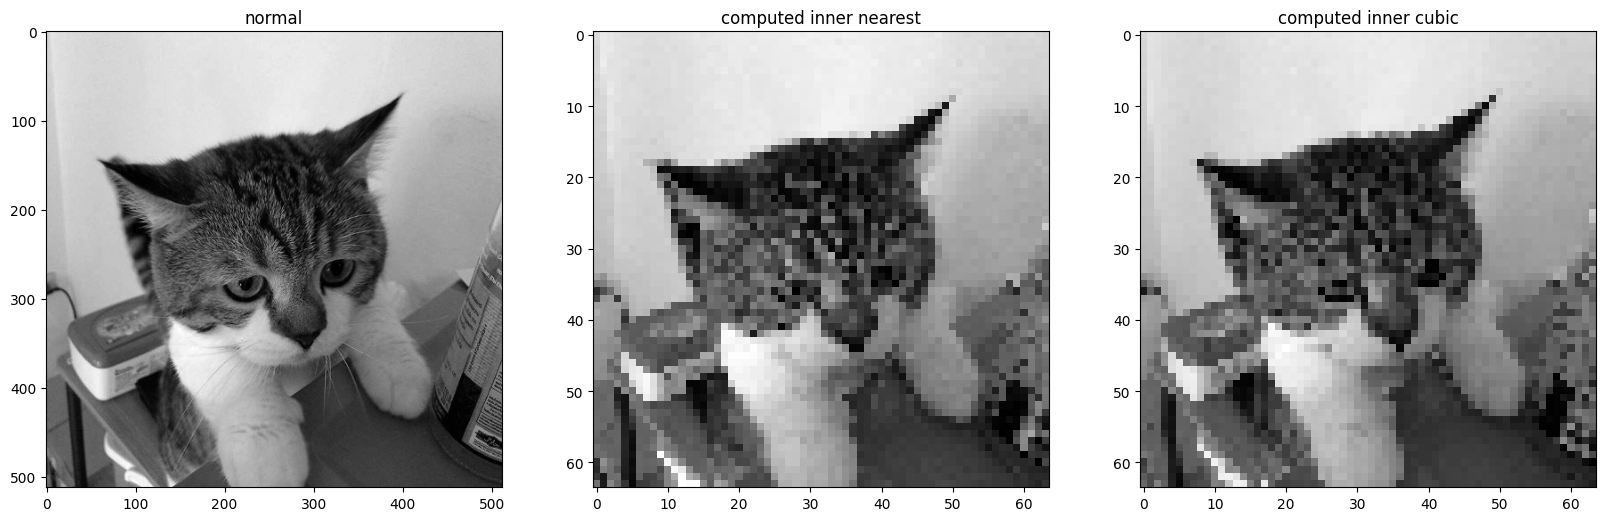

In [87]:
SIZE = 64

plt.figure(figsize=(20,10))

img = io.imread("kitty.jpg")
img = color.rgb2gray(img)
img_resize_nn = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
img_resize_bc = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_CUBIC)

# Write your code to visualize the results

plt.subplot(1,3,1)
plt.title('normal')
plt.imshow(img, cmap = 'gray')

plt.subplot(1,3,2)
plt.title('computed inner nearest')
plt.imshow(img_resize_nn, cmap = 'gray')

plt.subplot(1,3,3)
plt.title('computed inner cubic')
plt.imshow(img_resize_bc, cmap = 'gray')


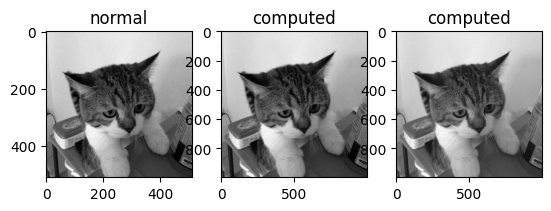

In [66]:
SIZE = 1000

img = io.imread("kitty.jpg")
img = color.rgb2gray(img)
img_resize_nn = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
img_resize_bc = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_CUBIC)

# Write your code to visualize the results

plt.subplot(1,3,1)
plt.title('normal')
plt.imshow(img, cmap = 'gray')

plt.subplot(1,3,2)
plt.title('computed')
plt.imshow(img_resize_nn, cmap = 'gray')

plt.subplot(1,3,3)
plt.title('computed')
plt.imshow(img_resize_bc, cmap = 'gray')


## Exercise #3 Arithmetic Operations
* Bias
* Gain

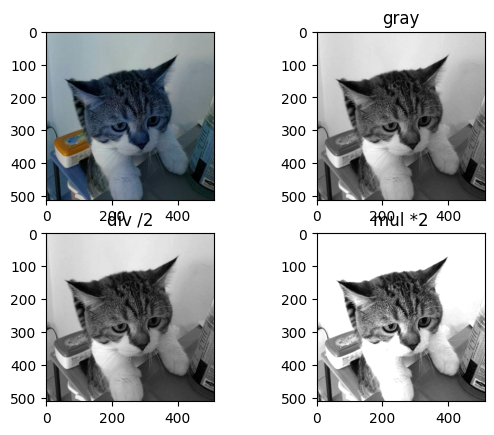

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

GAIN = 2

img = cv2.imread("kitty.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_div = cv2.divide(img_gray,GAIN)
img_mul = cv2.multiply(img_gray,GAIN)

# Write your code to visualize the results

plt.subplot(2,2,1)
plt.imshow(img)

plt.subplot(2,2,2)
plt.title('gray')
plt.imshow(img_gray, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('div /2')
plt.imshow(img_div, cmap = 'gray')

plt.subplot(2,2,4)
plt.title('mul *2')
plt.imshow(img_mul, cmap = 'gray')


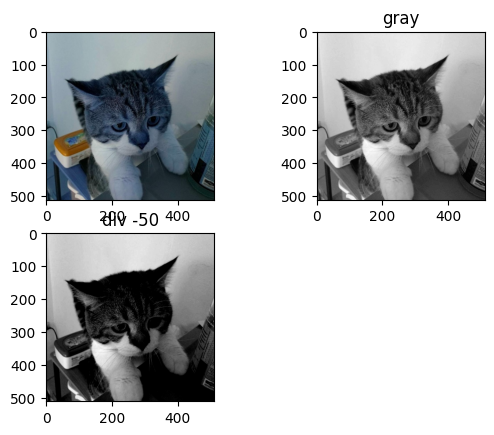

In [68]:
BIAS = 50

img = cv2.imread("kitty.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_div = cv2.subtract(img_gray,BIAS)

# Write your code to visualize the results


plt.subplot(2,2,1)
plt.imshow(img)

plt.subplot(2,2,2)
plt.title('gray')
plt.imshow(img_gray, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('div -50')
plt.imshow(img_div, cmap = 'gray')



Text(0.5, 1.0, 'add bias')

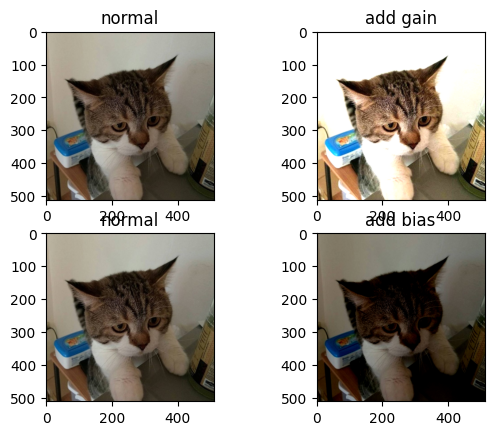

In [88]:
# working with RGB

img = cv2.imread("kitty.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# apply gain
GAIN = (2,2,2,1)
img_gain = np.copy(img)
img_gain = cv2.multiply(img_gain,GAIN)
# img_gain *= 2


plt.subplot(2,2,1)
plt.imshow(img)
plt.title('normal')

plt.subplot(2,2,2)
plt.imshow(img_gain)
plt.title('add gain')

BIAS = (-50,-50,-50,0)
img_bias = np.copy(img)
img_bias = cv2.add(img_bias, BIAS)

plt.subplot(2,2,3)
plt.imshow(img)
plt.title('normal')

plt.subplot(2,2,4)
plt.imshow(img_bias)
plt.title('add bias')


## Exercise #4 Color Models

Select one of the following color models, visualize each component in the model and analyze the results
-------
* HSV
* YCbCr
* CIELAB

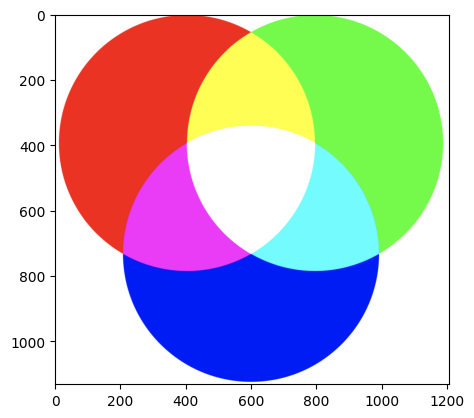

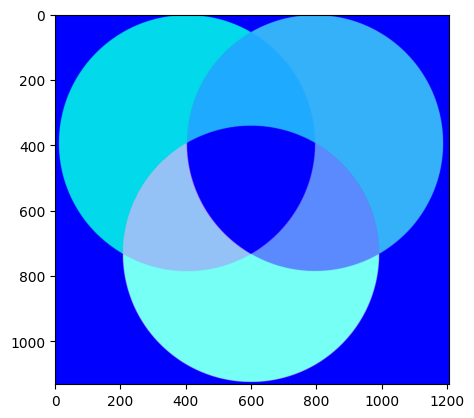

In [91]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("rgb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

plt.imshow(img_gray)


In [99]:
print(f'''\
original (r,g,b) pos 200,200 is\t{img[200][200]} -> red 
HSV format pos (200,200) is\t{img_gray[200][200]}

original (r,g,b) pos 1000,600 is{img[1000][600]} -> blue 
HSV format pos (1000,600) is\t{img_gray[1000][600]}

original (r,g,b) pos 600,600 is\t{img[600][600]} -> white 
HSV format pos (600,600) is\t{img_gray[600][600]}

so value of HSV format is [h, s, v] -> hue, saturation, value
''')

original (r,g,b) pos 200,200 is	[234  51  35] -> red 
HSV format pos (200,200) is	[  2 217 234]

original (r,g,b) pos 1000,600 is[  0  28 245] -> blue 
HSV format pos (1000,600) is	[117 255 245]

original (r,g,b) pos 600,600 is	[255 255 255] -> white 
HSV format pos (600,600) is	[  0   0 255]



